## <u> Implementing Multiple Linear Regression </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA_SETS/Copy of 50_Startups.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.shape

(50, 5)

### **Understanding the data**

Text(0.5, 1.0, 'R&D Spend vs Profit')

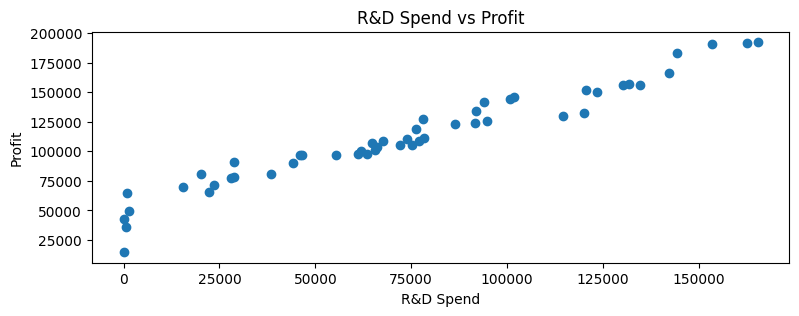

In [8]:
plt.figure(figsize=(9,3))
plt.scatter(df['R&D Spend'],df['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('R&D Spend vs Profit')

Text(0.5, 1.0, 'Administration vs Profit')

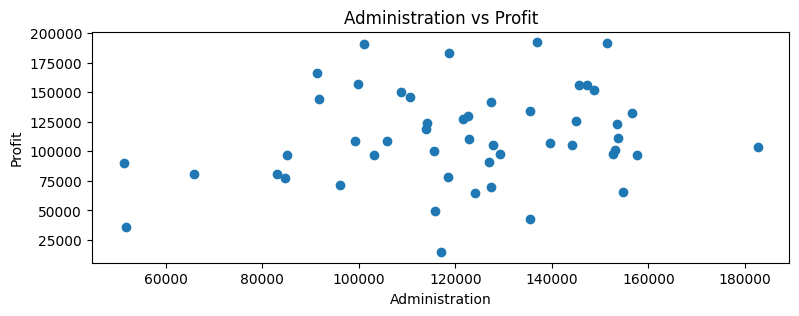

In [9]:
plt.figure(figsize=(9,3))
plt.scatter(df['Administration'],df['Profit'])
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Administration vs Profit')

Text(0.5, 1.0, 'Marketing Spend vs Profit')

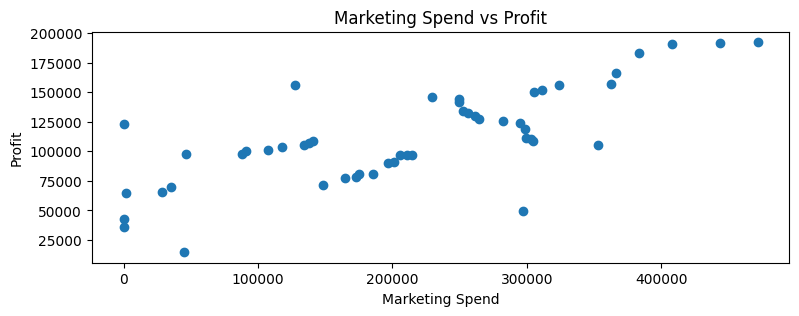

In [10]:
plt.figure(figsize=(9,3))
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spend vs Profit')

In [11]:
df['State'].value_counts()

,count
State,
New York,17
California,17
Florida,16


In [12]:
df.groupby('State')['Profit'].mean()

,Profit
State,
California,103905.175294
Florida,118774.024375
New York,113756.446471


Text(0.5, 1.0, 'Avg Profit')

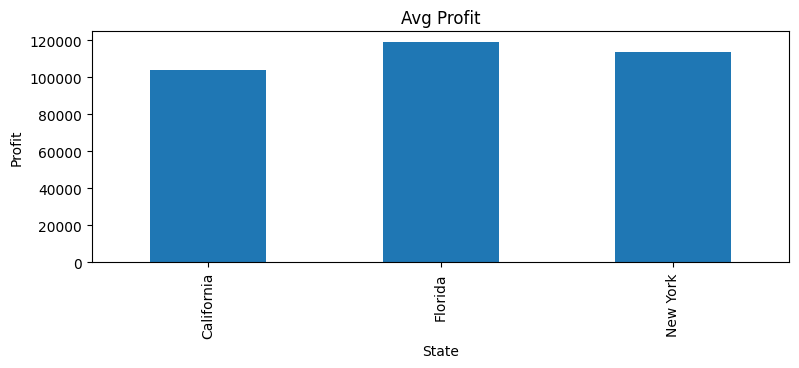

In [13]:
plt.figure(figsize=(9,3))
df.groupby('State')['Profit'].mean().plot(kind = 'bar')
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Avg Profit')

## **Data Processing**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [15]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
# Data Preprocessing Techniques

In [17]:
# state
# New York
# California
# Florida
# New York
# Florida

In [18]:
# 1> One hot encoding

# state
#   0
#   1
#   2
#   0
#   2

In [19]:
# 2> label encoding

# state_New York    state California    state Florida
#       1                 0                   0
#       0                 1                   0
#
#
#

In [20]:
# using label encoding

In [21]:
df['state_New York'] = np.where(df['State'] == 'New York',1,0)
df['state_California'] = np.where(df['State'] == 'California',1,0)
df['state_Florida'] = np.where(df['State'] == 'Florida',1,0)

In [22]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'state_New York', 'state_California', 'state_Florida'],
      dtype='object')

In [23]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,state_New York,state_California,state_Florida
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [24]:
df.drop(columns = ['State'],axis = 1,inplace = True)

In [25]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'state_New York', 'state_California', 'state_Florida'],
      dtype='object')

In [26]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,state_New York,state_California,state_Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


### Spliting the data

In [27]:
x = df.drop(columns = ['Profit'],axis = 1)
y = df['Profit']

In [28]:
x.head()

,R&D Spend,Administration,Marketing Spend,state_New York,state_California,state_Florida
0,165349.20,136897.80,471784.10,1,0,0
1,162597.70,151377.59,443898.53,0,1,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,1,0,0
4,142107.34,91391.77,366168.42,0,0,1


In [29]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [31]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,state_New York,state_California,state_Florida
12,93863.75,127320.38,249839.44,0,0,1
4,142107.34,91391.77,366168.42,0,0,1
37,44069.95,51283.14,197029.42,0,1,0
8,120542.52,148718.95,311613.29,1,0,0
3,144372.41,118671.85,383199.62,1,0,0


In [32]:
y_train.head()

,Profit
12,141585.52
4,166187.94
37,89949.14
8,152211.77
3,182901.99


In [33]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,state_New York,state_California,state_Florida
13,91992.39,135495.07,252664.93,0,1,0
39,38558.51,82982.09,174999.30,0,1,0
30,61994.48,115641.28,91131.24,0,0,1
45,1000.23,124153.04,1903.93,1,0,0
17,94657.16,145077.58,282574.31,1,0,0


In [34]:
y_test.head()

,Profit
13,134307.35
39,81005.76
30,99937.59
45,64926.08
17,125370.37


### Model Train

In [35]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [36]:
# coefficients of regression

In [37]:
model.coef_

array([ 8.05630064e-01, -6.87878823e-02,  2.98554429e-02, -3.08272495e+02,
       -3.15260255e+02,  6.23532751e+02])

In [38]:
# Intercept

In [39]:
model.intercept_

np.float64(54343.29984897948)

In [40]:
x_train.head(1)

,R&D Spend,Administration,Marketing Spend,state_New York,state_California,state_Florida
12,93863.75,127320.38,249839.44,0,0,1


In [41]:
# predicting the first row of train data-set using the model

In [42]:
print(model.predict([[93863.75,127320.38,249839.44,0,0,1]]))

[129287.25932268]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
y_train.head(1)

,Profit
12,141585.52


In [44]:
# Predicting 5 rows of train data

In [45]:
train_pred = model.predict(x_train)
train_pred[:5]

array([129287.25932268, 174098.25202593,  91886.85822583, 150220.99659018,
       173623.19035613])

In [46]:
y_train.head()

,Profit
12,141585.52
4,166187.94
37,89949.14
8,152211.77
3,182901.99


In [47]:
# Predicting 5 rows of test data-set

In [48]:
test_pred = model.predict(x_test)
test_pred[:5]

array([126362.87908255,  84608.45383633,  99677.49425146,  46357.46068582,
       128750.48288505])

In [49]:
y_test.head()

,Profit
13,134307.35
39,81005.76
30,99937.59
45,64926.08
17,125370.37


In [50]:
# Finding the mean squared error,mean absolute error, mean absolute percentage error for the trained data-set

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [52]:
print('Train mean_squared_error :- ',mean_squared_error(y_train,train_pred))
print('Train mean_absolute_error :- ',mean_absolute_error(y_train,train_pred))
print('Train mean_absolute_percentage_error :- ',mean_absolute_percentage_error(y_train,train_pred)*100)

Train mean_squared_error :-  79700060.08259319
Train mean_absolute_error :-  6662.656240897503
Train mean_absolute_percentage_error :-  10.947756972103429


In [53]:
# Finding the mean squared error,mean absolute error, mean absolute percentage error for the test data-set

In [54]:
print('Test mean_squared_error :- ',mean_squared_error(y_test,test_pred))
print('Test mean_absolute_error :- ',mean_absolute_error(y_test,test_pred))
print('Test mean_absolute_percentage_error :- ',mean_absolute_percentage_error(y_test,test_pred)*100)

Test mean_squared_error :-  82010363.0442354
Test mean_absolute_error :-  6961.477813250242
Test mean_absolute_percentage_error :-  10.278189896347753
